In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('falldataproject.csv',index_col='obs')

In [3]:
# Display first five records of data
data.head()

,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,...,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
obs,,,,,,,,,,,,,,,,,,,,,
0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,-0.105793,...,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206,1
1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,0.602582,...,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721,1
2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,0.200807,...,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479,1
3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,2.382995,...,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2.407953,1.233629,2.702845,1
4,2.338575,-2.699941,-0.069211,-0.025849,1.420714,2.137326,1.097388,2.101987,1.200319,0.312032,...,-2.766941,0.168817,-1.116162,-1.640847,1.527936,2.215856,2.353429,0.721413,2.933661,1


In [4]:
# Display randomly any number of records of data
data.sample(10)

,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,...,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
obs,,,,,,,,,,,,,,,,,,,,,
2393,-0.359745,-0.070509,0.399490,-0.024918,-0.234329,-0.110515,-1.527088,-0.011742,-0.684046,-0.152222,...,-0.182778,-0.585910,-0.723576,-0.877413,-0.289931,-0.273130,0.069327,0.549600,-0.232169,0
2079,-0.318323,0.353891,0.106552,0.124927,-0.299394,-0.394659,-0.059872,-0.521357,-0.166455,-0.167934,...,-0.182778,-0.585910,-1.155420,-1.640847,-0.243878,-0.266270,0.063956,0.721413,-0.343458,0
2346,0.918407,-1.814238,0.047965,-0.002348,0.717211,1.469080,-0.248767,0.510425,-0.349019,-0.135921,...,-0.486797,-0.774592,-0.330991,-0.495696,0.256641,0.743149,1.474074,0.072991,2.065957,0
2305,-0.460340,0.612221,0.194433,0.170998,-0.333597,-0.707197,-0.243683,-0.570766,-0.199929,-0.168132,...,-0.030768,-0.019865,1.828229,0.942104,-0.441420,-0.431428,-1.126802,-1.079262,-0.962105,0
1922,-0.430753,0.519960,-0.010623,-0.001418,-0.326115,-0.598215,0.020883,-0.439623,-0.136521,-0.168051,...,0.121241,0.357499,-0.252474,-0.572040,-0.350526,-0.352279,-0.423095,0.003508,-0.607727,0
505,-0.424836,0.584543,0.223727,0.199850,-0.332018,-0.677295,-0.098610,-0.279220,-0.158218,-0.164826,...,0.121241,-0.397228,1.121575,0.758516,-0.411122,-0.405045,-0.927944,-1.079262,-0.677463,0
78,2.391831,-2.727620,0.458077,0.068153,1.320622,2.051741,1.124372,2.608418,1.509112,0.587243,...,-1.854883,1.300907,-0.723576,2.176322,2.395664,1.925641,2.303291,0.398748,3.056458,1
1691,-0.424836,0.686030,0.282315,0.359235,-0.333992,-0.715964,0.923477,-0.218163,0.201327,-0.158578,...,0.273251,0.168817,1.631936,0.890539,-0.441420,-0.431428,-1.054968,-1.079262,-0.859283,0
863,-0.489927,0.519960,-0.362148,-0.335778,-0.330709,-0.656511,0.333646,-0.483126,-0.073250,-0.168110,...,0.577270,-0.397228,1.043058,0.860617,-0.411122,-0.405045,-0.877082,-1.079262,-0.604660,0


In [5]:
#Number of rows ans columns
data.shape

(2821, 88)

In [6]:
#Types of all columns
data.dtypes

raw_feat_X1       float64
raw_feat_X2       float64
raw_feat_X3       float64
raw_feat_X4       float64
raw_feat_X5       float64
                   ...   
deriv_feat_X26    float64
deriv_feat_X27    float64
deriv_feat_X28    float64
deriv_feat_X29    float64
FALL                int64
Length: 88, dtype: object

In [7]:
# is there any null value 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2821 entries, 0 to 2820
Data columns (total 88 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   raw_feat_X1     2821 non-null   float64
 1   raw_feat_X2     2821 non-null   float64
 2   raw_feat_X3     2821 non-null   float64
 3   raw_feat_X4     2821 non-null   float64
 4   raw_feat_X5     2821 non-null   float64
 5   raw_feat_X6     2821 non-null   float64
 6   raw_feat_X7     2821 non-null   float64
 7   raw_feat_X8     2821 non-null   float64
 8   raw_feat_X9     2821 non-null   float64
 9   raw_feat_X10    2821 non-null   float64
 10  raw_feat_X11    2821 non-null   float64
 11  raw_feat_X12    2821 non-null   float64
 12  raw_feat_X13    2821 non-null   float64
 13  raw_feat_X14    2821 non-null   float64
 14  raw_feat_X15    2821 non-null   float64
 15  raw_feat_X16    2821 non-null   float64
 16  raw_feat_X17    2821 non-null   float64
 17  raw_feat_X18    2821 non-null   f

In [8]:
#statistical
data.describe()

,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,...,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29,FALL
count,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,...,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2.821000e+03,2821.000000
mean,1.667207e-09,3.795496e-10,3.899275e-09,1.012218e-09,-1.859469e-10,8.210841e-10,-1.549027e-09,2.222062e-10,-4.717056e-10,-7.275646e-10,...,-3.200372e-09,-2.909187e-09,5.263204e-09,-6.966069e-09,9.615325e-10,6.541429e-10,4.666482e-09,2.200017e-08,2.628659e-09,0.071606
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.257880
min,-6.556134e-01,-1.251649e+01,-9.179574e+00,-7.429472e+00,-3.358292e-01,-7.739324e-01,-5.607134e+00,-7.696240e-01,-1.220157e+01,-1.688974e-01,...,-1.203952e+01,-4.925589e+00,-1.626523e+00,-1.640847e+00,-4.717174e-01,-4.578115e-01,-1.453174e+00,-1.079262e+00,-1.429270e+00,0.000000
25%,-4.307534e-01,-3.360438e-02,-4.207358e-01,-3.913882e-01,-3.254221e-01,-5.906837e-01,-6.110919e-01,-4.714865e-01,-3.361604e-01,-1.676649e-01,...,-3.076833e-02,-3.972282e-01,-8.413519e-01,-7.501742e-01,-4.111218e-01,-3.981856e-01,-8.334801e-01,-1.079262e+00,-6.482631e-01,0.000000
50%,-3.242407e-01,3.446649e-01,4.796453e-02,4.302406e-02,-2.970101e-01,-3.810222e-01,-9.745396e-02,-2.983617e-01,-1.730300e-01,-1.650185e-01,...,1.212412e-01,-2.085465e-01,-2.132152e-01,-3.763596e-02,-3.044736e-01,-3.121766e-01,-2.040076e-01,-3.182769e-02,-3.324688e-01,0.000000
75%,-8.754601e-02,5.199604e-01,4.580773e-01,4.341580e-01,-1.696682e-01,8.801807e-02,4.586932e-01,-1.885279e-03,3.140814e-02,-1.552820e-01,...,4.252604e-01,1.688170e-01,8.467654e-01,6.700878e-01,-1.372299e-01,-1.538778e-01,5.182496e-01,5.495999e-01,2.615398e-01,0.000000
max,1.310227e+01,8.797775e-01,4.149093e+00,5.424897e+00,2.706610e+01,1.087081e+01,4.899731e+00,8.533954e+00,8.310348e+00,3.199345e+01,...,1.945356e+00,1.205576e+01,3.241536e+00,3.489428e+00,1.226668e+01,1.303611e+01,3.997984e+00,4.653876e+00,4.192527e+00,1.000000


In [9]:
# count null values
data.isnull().sum()

raw_feat_X1       0
raw_feat_X2       0
raw_feat_X3       0
raw_feat_X4       0
raw_feat_X5       0
                 ..
deriv_feat_X26    0
deriv_feat_X27    0
deriv_feat_X28    0
deriv_feat_X29    0
FALL              0
Length: 88, dtype: int64

In [10]:
# display column names
data.columns

Index(['raw_feat_X1', 'raw_feat_X2', 'raw_feat_X3', 'raw_feat_X4',
       'raw_feat_X5', 'raw_feat_X6', 'raw_feat_X7', 'raw_feat_X8',
       'raw_feat_X9', 'raw_feat_X10', 'raw_feat_X11', 'raw_feat_X12',
       'raw_feat_X13', 'raw_feat_X14', 'raw_feat_X15', 'raw_feat_X16',
       'raw_feat_X17', 'raw_feat_X18', 'raw_feat_X19', 'raw_feat_X20',
       'raw_feat_X21', 'raw_feat_X22', 'raw_feat_X23', 'raw_feat_X24',
       'raw_feat_X25', 'raw_feat_X26', 'raw_feat_X27', 'raw_feat_X28',
       'raw_feat_X29', 'fft_feat_X1', 'fft_feat_X2', 'fft_feat_X3',
       'fft_feat_X4', 'fft_feat_X5', 'fft_feat_X6', 'fft_feat_X7',
       'fft_feat_X8', 'fft_feat_X9', 'fft_feat_X10', 'fft_feat_X11',
       'fft_feat_X12', 'fft_feat_X13', 'fft_feat_X14', 'fft_feat_X15',
       'fft_feat_X16', 'fft_feat_X17', 'fft_feat_X18', 'fft_feat_X19',
       'fft_feat_X20', 'fft_feat_X21', 'fft_feat_X22', 'fft_feat_X23',
       'fft_feat_X24', 'fft_feat_X25', 'fft_feat_X26', 'fft_feat_X27',
       'fft_feat_X28', '

Negative (0):  2619
Positive (1):  202


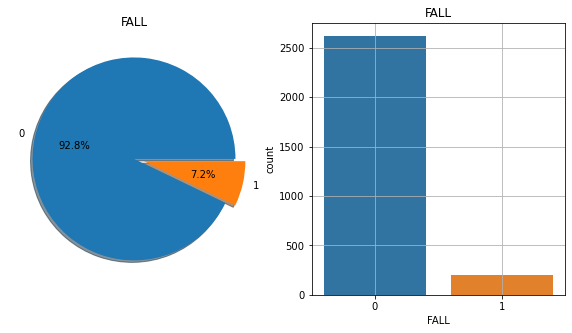

In [11]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data['FALL'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('FALL')
ax[0].set_ylabel('')
sns.countplot('FALL',data=data, ax=ax[1])
ax[1].set_title('FALL')
N,P=data['FALL'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)
plt.grid()
plt.show()

The countplot shows that the dataset is imbalanced. Number of 0 is more than 1

In [12]:
# correlations of FALL
corr_mat = data.corrwith(data['FALL'])
corr_mat.sort_values()


deriv_feat_X2    -0.815325
raw_feat_X2      -0.705596
raw_feat_X21     -0.647709
raw_feat_X20     -0.626664
deriv_feat_X21   -0.626224
                    ...   
deriv_feat_X25    0.813291
deriv_feat_X26    0.815790
deriv_feat_X1     0.816241
deriv_feat_X14    0.819325
FALL              1.000000
Length: 88, dtype: float64

The correlation shows that there is a high correlation between FALL and (deriv_feat_X1,deriv_feat_X14, deriv_feat_X25,deriv_feat_X26 ). We can select these features to accept input from the user and predict the outcome.

In [13]:
target_name = 'FALL'
y=data[target_name]
X=data.drop(target_name,axis=1)

In [14]:
X.head()

,raw_feat_X1,raw_feat_X2,raw_feat_X3,raw_feat_X4,raw_feat_X5,raw_feat_X6,raw_feat_X7,raw_feat_X8,raw_feat_X9,raw_feat_X10,...,deriv_feat_X20,deriv_feat_X21,deriv_feat_X22,deriv_feat_X23,deriv_feat_X24,deriv_feat_X25,deriv_feat_X26,deriv_feat_X27,deriv_feat_X28,deriv_feat_X29
obs,,,,,,,,,,,,,,,,,,,,,
0,0.249744,-0.162770,0.223727,0.393904,-0.154366,0.128968,1.090661,0.913849,0.505526,-0.105793,...,-0.676243,0.121241,0.734862,0.179370,0.402461,0.638393,0.344236,0.823239,-0.409350,1.425206
1,0.385843,-0.660978,-0.127798,-0.205710,-0.160936,0.111606,0.171391,2.889781,0.377333,0.602582,...,0.549323,-0.182778,0.357499,-0.056181,0.840313,0.605672,0.655029,1.052671,-0.177353,1.613721
2,3.344528,-4.535931,0.165140,-0.228745,3.203818,3.379462,1.089901,2.097552,0.877990,0.200807,...,-1.376566,0.425260,8.093449,-0.684318,0.046744,3.440332,3.965586,2.916183,0.367674,3.952479
3,3.190676,-2.884463,-1.153080,-0.698292,1.868221,2.493077,2.546198,3.817391,3.711000,2.382995,...,-3.652617,-4.743065,-0.774592,-1.076903,-0.818687,3.572430,3.409429,2.407953,1.233629,2.702845
4,2.338575,-2.699941,-0.069211,-0.025849,1.420714,2.137326,1.097388,2.101987,1.200319,0.312032,...,-2.777213,-2.766941,0.168817,-1.116162,-1.640847,1.527936,2.215856,2.353429,0.721413,2.933661


In [15]:
y.head()

obs
0    1
1    1
2    1
3    1
4    1
Name: FALL, dtype: int64

In [16]:
random.sample(range(29),17)

[17, 16, 1, 18, 0, 23, 10, 15, 19, 8, 5, 6, 13, 27, 20, 11, 25]

In [17]:
def random_features(X):
    features = []
    for i in random.sample(range(29),17):
        features.append('raw_feat_X'+str(i+1))
        features.append('fft_feat_X'+str(i+1))
        features.append('deriv_feat_X'+str(i+1))
    return features
        

In [18]:
X = X[random_features(X)]

In [19]:
X.columns

Index(['raw_feat_X4', 'fft_feat_X4', 'deriv_feat_X4', 'raw_feat_X12',
       'fft_feat_X12', 'deriv_feat_X12', 'raw_feat_X3', 'fft_feat_X3',
       'deriv_feat_X3', 'raw_feat_X28', 'fft_feat_X28', 'deriv_feat_X28',
       'raw_feat_X21', 'fft_feat_X21', 'deriv_feat_X21', 'raw_feat_X7',
       'fft_feat_X7', 'deriv_feat_X7', 'raw_feat_X16', 'fft_feat_X16',
       'deriv_feat_X16', 'raw_feat_X17', 'fft_feat_X17', 'deriv_feat_X17',
       'raw_feat_X14', 'fft_feat_X14', 'deriv_feat_X14', 'raw_feat_X9',
       'fft_feat_X9', 'deriv_feat_X9', 'raw_feat_X20', 'fft_feat_X20',
       'deriv_feat_X20', 'raw_feat_X11', 'fft_feat_X11', 'deriv_feat_X11',
       'raw_feat_X13', 'fft_feat_X13', 'deriv_feat_X13', 'raw_feat_X19',
       'fft_feat_X19', 'deriv_feat_X19', 'raw_feat_X26', 'fft_feat_X26',
       'deriv_feat_X26', 'raw_feat_X5', 'fft_feat_X5', 'deriv_feat_X5',
       'raw_feat_X29', 'fft_feat_X29', 'deriv_feat_X29'],
      dtype='object')

### Splitting Dataset

In [20]:
from sklearn.model_selection import train_test_split
#defining the test size
size_test = 0.2
print('test size is :'+str(size_test))
#splitting the dataset into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=size_test,random_state=12)


test size is :0.2


In [21]:
X_test.shape,y_test.shape

((565, 51), (565,))

In [22]:
X_train.shape,y_train.shape

((2256, 51), (2256,))

### Classification Algorithms 

##### Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#fitting the model
gnbfit = gnb.fit(X_train, y_train)

##### KNeighbors Classifier KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#fitting the model
knnfit = knn.fit(X_train, y_train)

##### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
#fitting the model
lrfit = lr.fit(X_train, y_train)

##### Support Vector Machine (SVM)

In [26]:
from sklearn.svm import SVC
sv=SVC()
#fitting the model
svfit = sv.fit(X_train, y_train)

##### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#fitting the model
dtfit= dt.fit(X_train, y_train)

[Text(1063.2162162162163, 1055.2235294117647, 'deriv_feat_X14 <= 1.226\ngini = 0.14\nsamples = 2256\nvalue = [2085, 171]\nclass = F'),
 Text(852.081081081081, 991.2705882352941, 'deriv_feat_X14 <= 0.643\ngini = 0.031\nsamples = 2108\nvalue = [2075, 33]\nclass = F'),
 Text(731.4324324324324, 927.3176470588236, 'deriv_feat_X19 <= 1.734\ngini = 0.014\nsamples = 2053\nvalue = [2039, 14]\nclass = F'),
 Text(671.1081081081081, 863.364705882353, 'raw_feat_X21 <= 3.319\ngini = 0.013\nsamples = 2052\nvalue = [2039, 13]\nclass = F'),
 Text(610.7837837837837, 799.4117647058824, 'raw_feat_X29 <= 2.117\ngini = 0.012\nsamples = 2051\nvalue = [2039, 12]\nclass = F'),
 Text(550.4594594594595, 735.4588235294118, 'raw_feat_X7 <= 4.194\ngini = 0.011\nsamples = 2050\nvalue = [2039, 11]\nclass = F'),
 Text(490.1351351351351, 671.5058823529412, 'raw_feat_X20 <= -0.443\ngini = 0.01\nsamples = 2049\nvalue = [2039, 10]\nclass = F'),
 Text(180.97297297297297, 607.5529411764707, 'raw_feat_X12 <= -0.497\ngini = 0

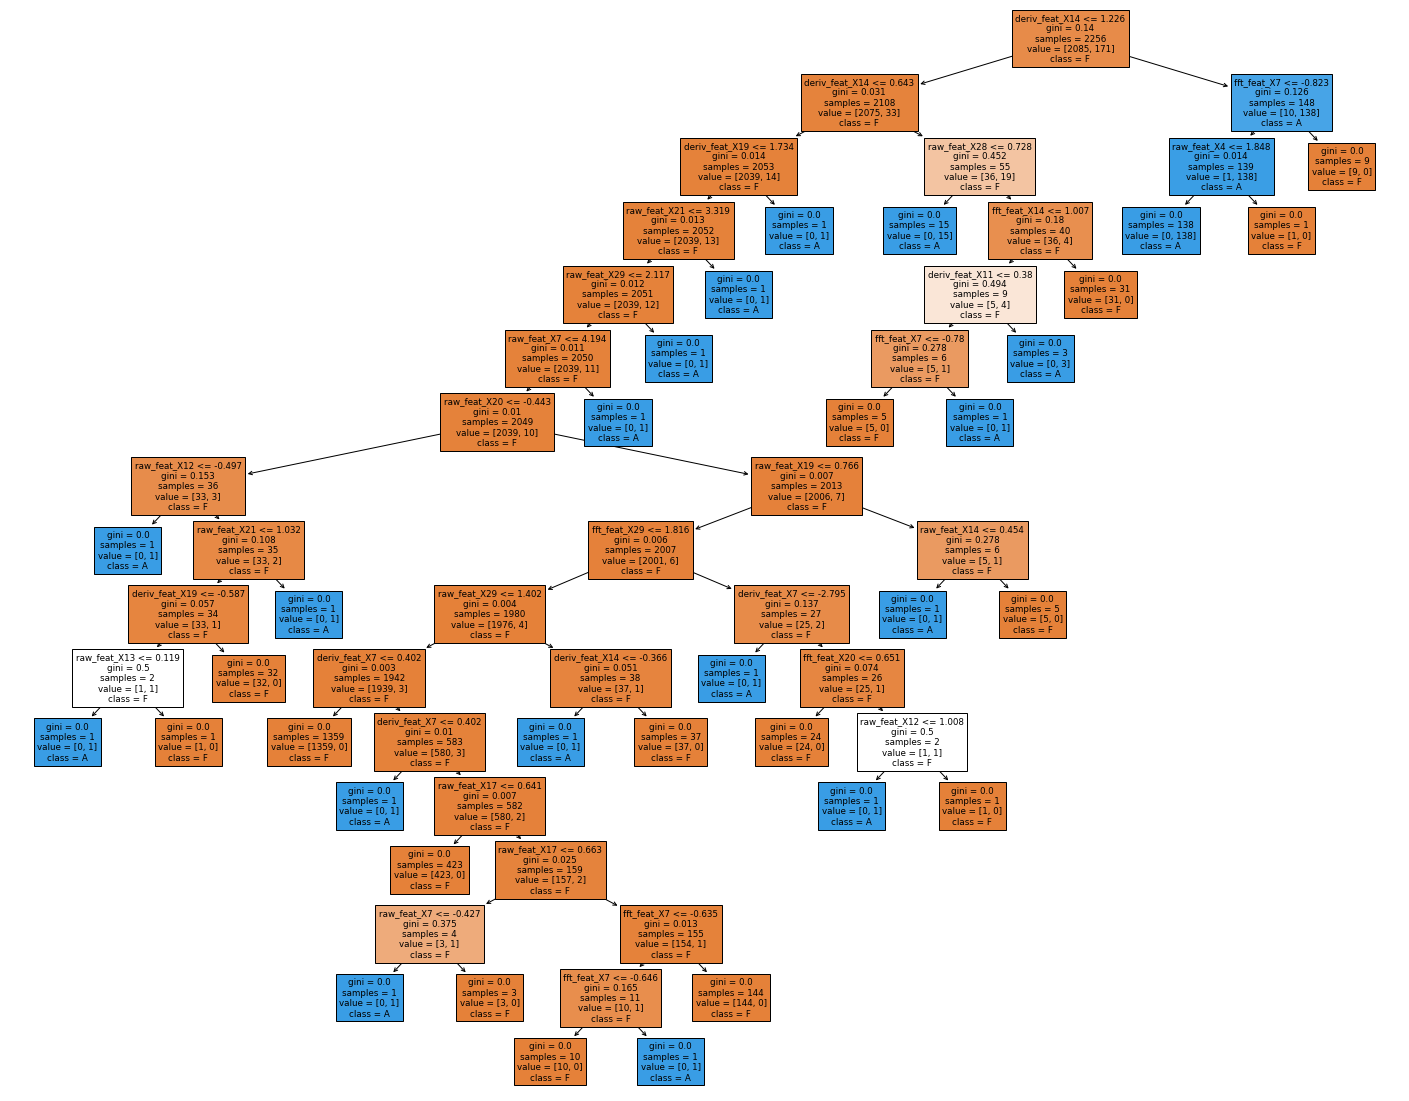

In [28]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dtfit,feature_names=X.columns,  class_names='FALL',filled=True)

##### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini')
#fitting the model
rffit= rf.fit(X_train, y_train)

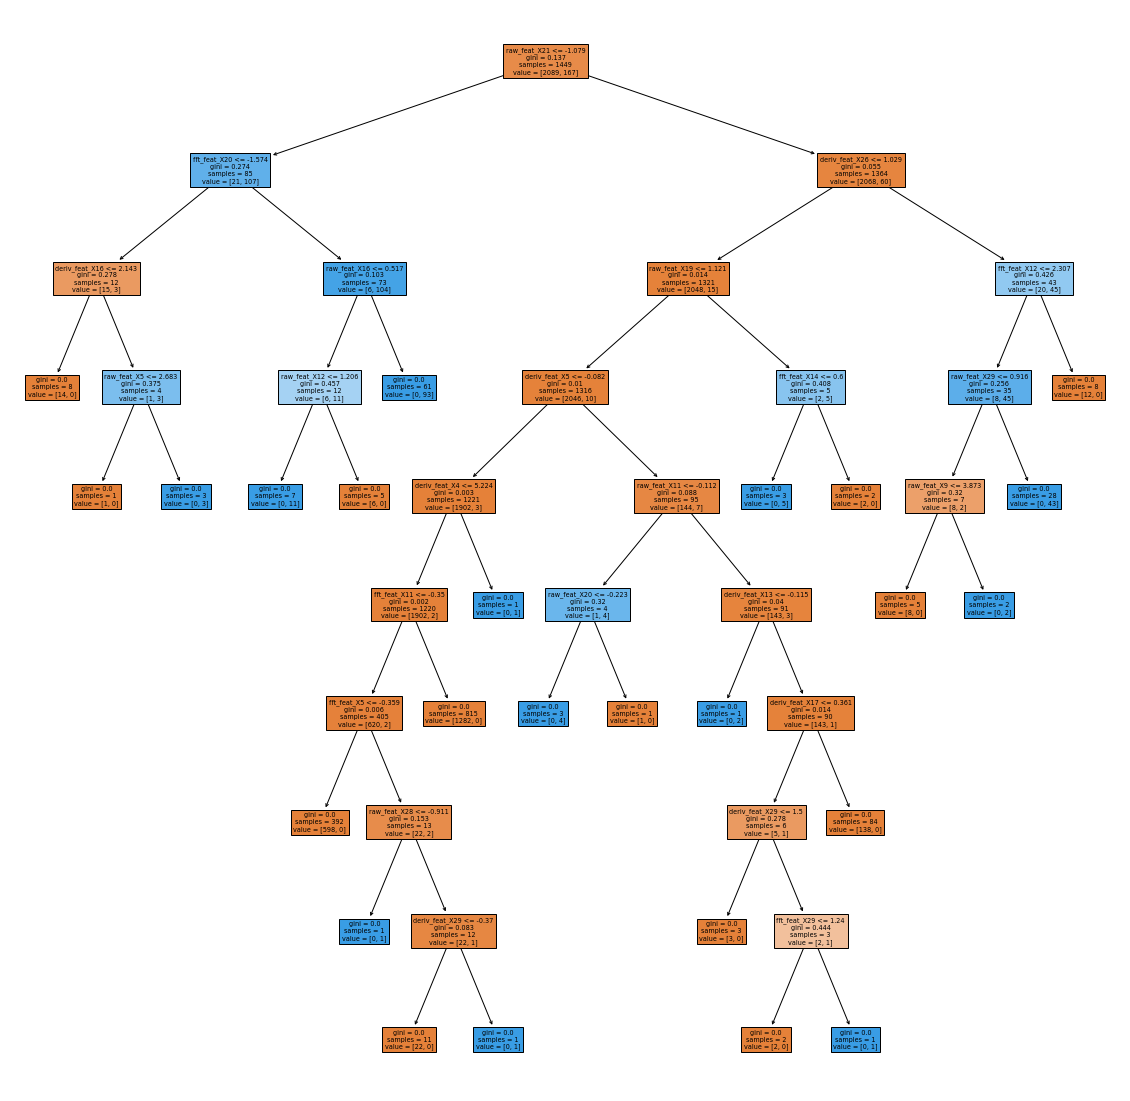

In [30]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rffit.estimators_[0], feature_names=X.columns, filled=True)

### Prediction

In [31]:
gnb_pred = gnbfit.predict(X_test)

In [32]:
knn_pred = knnfit.predict(X_test)

In [33]:
lr_pred = lrfit.predict(X_test)

In [34]:
sv_pred = svfit.predict(X_test)

In [35]:
dt_pred = dtfit.predict(X_test)

In [36]:
rf_pred = rffit.predict(X_test)

### performance of Algorithms

##### Train and Test Score

In [37]:
from sklearn import metrics
print("Train Accuracy of NB",gnbfit.score(X_train,y_train)*100)
nb__accuracy = metrics.accuracy_score(y_test,gnb_pred)*100
print("Test Accuracy of NB",nb__accuracy)

Train Accuracy of NB 96.27659574468085
Test Accuracy of NB 97.69911504424779


In [38]:
print("Train Accuracy of KNN",knnfit.score(X_train,y_train)*100)
knn__accuracy = metrics.accuracy_score(y_test,knn_pred)*100
print("Test Accuracy of KNN",knn__accuracy)

Train Accuracy of KNN 98.84751773049646
Test Accuracy of KNN 99.64601769911503


In [39]:
print("Train Accuracy of LR",lrfit.score(X_train,y_train)*100)
lr__accuracy = metrics.accuracy_score(y_test,lr_pred)*100
print("Test Accuracy of LR",lr__accuracy)

Train Accuracy of LR 99.29078014184397
Test Accuracy of LR 99.64601769911503


In [40]:
print("Train Accuracy of SVM",svfit.score(X_train,y_train)*100)
sv__accuracy = metrics.accuracy_score(y_test,sv_pred)*100
print("Test Accuracy of SVM",sv__accuracy)

Train Accuracy of SVM 99.15780141843972
Test Accuracy of SVM 99.46902654867257


In [41]:
print("Train Accuracy of Decision Tree",dtfit.score(X_train,y_train)*100)
dt__accuracy = metrics.accuracy_score(y_test,dt_pred)*100
print("Test Accuracy of Decision Tree",dt__accuracy)

Train Accuracy of Decision Tree 100.0
Test Accuracy of Decision Tree 98.4070796460177


In [42]:
print("Train Accuracy of Random Forest",rffit.score(X_train,y_train)*100)
rf__accuracy = metrics.accuracy_score(y_test,rf_pred)*100
print("Test Accuracy of Random Forest",rf__accuracy)

Train Accuracy of Random Forest 100.0
Test Accuracy of Random Forest 99.64601769911503


### Confusion Matrix

##### Naive Bayes

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,gnb_pred)
cm


array([[521,  13],
       [  0,  31]])

<AxesSubplot:>

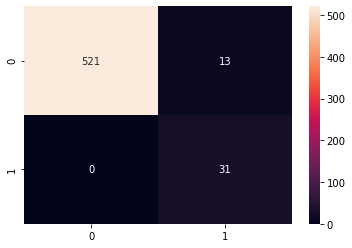

In [44]:
sns.heatmap(confusion_matrix(y_test,gnb_pred),annot=True, fmt="d")

In [45]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

(521, 13, 0, 31)

##### KNeighbors Classifier 

In [46]:
cm=confusion_matrix(y_test,knn_pred)
cm

array([[532,   2],
       [  0,  31]])

<AxesSubplot:>

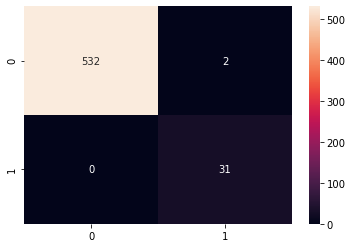

In [47]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True, fmt="d")

In [48]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

(532, 2, 0, 31)

##### Logistic Regression


In [49]:
cm=confusion_matrix(y_test,lr_pred)
cm

array([[532,   2],
       [  0,  31]])

<AxesSubplot:>

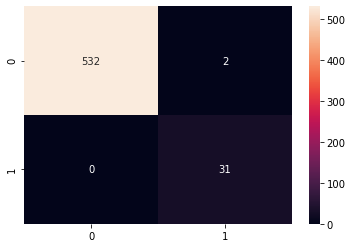

In [50]:
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True, fmt="d")

In [51]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

(532, 2, 0, 31)

##### Support Vector Machine (SVM)


In [52]:
cm=confusion_matrix(y_test,sv_pred)
cm

array([[533,   1],
       [  2,  29]])

<AxesSubplot:>

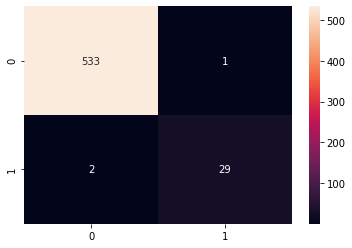

In [53]:
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True, fmt="d")

In [54]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

(532, 1, 2, 29)

##### Decision Tree

In [55]:
cm=confusion_matrix(y_test,dt_pred)
cm

array([[525,   9],
       [  0,  31]])

<AxesSubplot:>

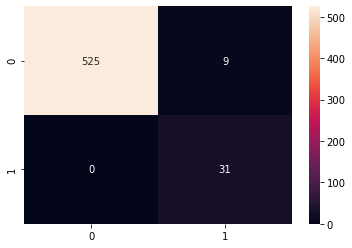

In [56]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True, fmt="d")

In [57]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

(532, 9, 0, 31)

##### Random Forest

In [58]:
cm=confusion_matrix(y_test,rf_pred)
cm

array([[532,   2],
       [  0,  31]])

<AxesSubplot:>

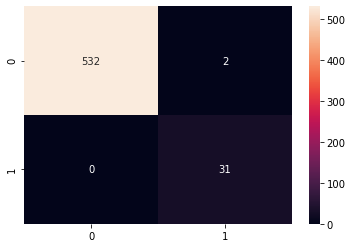

In [59]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True, fmt="d")

In [60]:
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN,FP,FN,TP

(532, 2, 0, 31)

### Precision score

In [61]:
#Precision score is an indicator which is defined as the number of true positives (tp) 
#over the number of true positives plus the number of false positives (fp)

##### Naive Bayes

In [62]:
nb_precision = metrics.precision_score(y_test,gnb_pred)
print("Naive Bayes has a precision of : "+str(nb_precision))

Naive Bayes has a precision of : 0.7045454545454546


##### KNeighbors Classifier 


In [63]:
knn_precision = metrics.precision_score(y_test,knn_pred)
print("KNeighbors Classifier has a precision of : "+str(knn_precision))

KNeighbors Classifier has a precision of : 0.9393939393939394


##### Logistic Regression


In [64]:
lr_precision = metrics.precision_score(y_test,lr_pred)
print("Logistic Regression has a precision of : "+str(lr_precision))

Logistic Regression has a precision of : 0.9393939393939394


##### Support Vector Machine (SVM)¶

In [65]:
sv_precision = metrics.precision_score(y_test,sv_pred)
print("Support Vector Machine has a precision of : "+str(sv_precision))

Support Vector Machine has a precision of : 0.9666666666666667


#####  Decision Tree

In [66]:
dt_precision = metrics.precision_score(y_test,dt_pred)
print("Decision Tree has a precision of : "+str(dt_precision))

Decision Tree has a precision of : 0.775


##### Random Forest

In [67]:
rf_precision = metrics.precision_score(y_test,rf_pred)
print("Random Forest has a precision of : "+str(rf_precision))

Random Forest has a precision of : 0.9393939393939394


### Recall score

In [68]:
#Recall score is an indicator which is is defined as the number of true positives (tp) 
#over the number of true positives plus the number of false negatives (fn).

##### Naive Bayes

In [69]:
nb_recall = metrics.recall_score(y_test,gnb_pred)
print("Naive Bayes has a recall of : "+str(nb_recall))

Naive Bayes has a recall of : 1.0


##### KNeighbors Classifier 


In [70]:
knn_recall = metrics.recall_score(y_test,knn_pred)
print("KNeighbors Classifier has a recall of : "+str(knn_recall))

KNeighbors Classifier has a recall of : 1.0


##### Logistic Regression


In [71]:
lr_recall = metrics.recall_score(y_test,lr_pred)
print("Logistic Regression has a recall of : "+str(lr_recall))

Logistic Regression has a recall of : 1.0


##### Support Vector Machine (SVM)¶

In [72]:
sv_recall = metrics.recall_score(y_test,sv_pred)
print("Support Vector Machine has a recall of : "+str(sv_recall))

Support Vector Machine has a recall of : 0.9354838709677419


#####  Decision Tree

In [73]:
dt_recall = metrics.recall_score(y_test,dt_pred)
print("Decision Tree has a recall of : "+str(dt_recall))

Decision Tree has a recall of : 1.0


##### Random Forest

In [74]:
rf_recall = metrics.recall_score(y_test,rf_pred)
print("Random Forest has a recall of : "+str(rf_recall))

Random Forest has a recall of : 1.0


### ROC curve

##### Naive Bayes

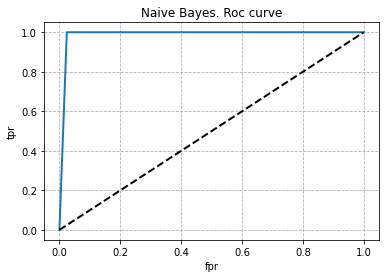

In [75]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test,gnb_pred)
plt.plot(fpr,tpr, linewidth = 2)
plt.title('Naive Bayes. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth = 2)
plt.grid(linestyle = 'dashed')
plt.show()



##### KNeighbors Classifier 


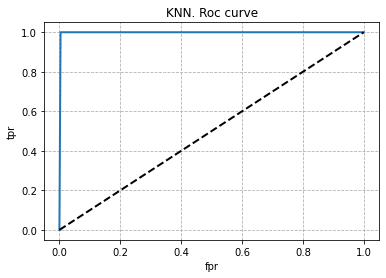

In [76]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test,knn_pred)
plt.plot(fpr,tpr, linewidth = 2)
plt.title('KNN. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth = 2)
plt.grid(linestyle = 'dashed')
plt.show()

##### Logistic Regression


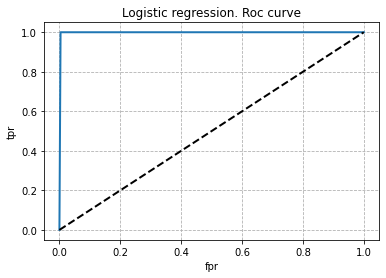

In [77]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test,lr_pred)
plt.plot(fpr,tpr, linewidth = 2)
plt.title('Logistic regression. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth = 2)
plt.grid(linestyle = 'dashed')
plt.show()

##### Support Vector Machine (SVM)¶

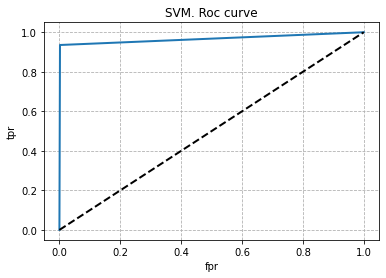

In [78]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test,sv_pred)
plt.plot(fpr,tpr, linewidth = 2)
plt.title('SVM. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth = 2)
plt.grid(linestyle = 'dashed')
plt.show()

#####  Decision Tree

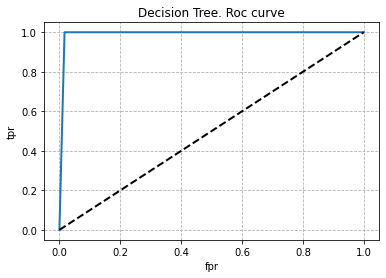

In [79]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test,dt_pred)
plt.plot(fpr,tpr, linewidth = 2)
plt.title('Decision Tree. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth = 2)
plt.grid(linestyle = 'dashed')
plt.show()

##### Random Forest

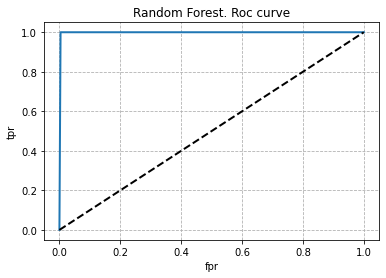

In [80]:
fpr, tpr, thresholds  = metrics.roc_curve(y_test,rf_pred)
plt.plot(fpr,tpr, linewidth = 2)
plt.title('Random Forest. Roc curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot(tpr,tpr,"k--", linewidth = 2)
plt.grid(linestyle = 'dashed')
plt.show()

### K-FOLD

In [81]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)

##### Naive Bayes

In [82]:
gnb_accuracy = []
gnb_f1_score = []

##### KNeighbors Classifier 


In [83]:
knn_accuracy = []
knn_f1_score = []

##### Logistic Regression


In [84]:
lr_accuracy = []
lr_f1_score = []

##### Support Vector Machine (SVM)¶

In [85]:
sv_accuracy = []
sv_f1_score = []

#####  Decision Tree

In [86]:
dt_accuracy = []
dt_f1_score = []

##### Random Forest

In [87]:
rf_accuracy = []
rf_f1_score = []

In [88]:
#Applying K-Fold on the models 
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #fitting models
    gnbfit = gnb.fit(X_train, y_train)
    knnfit = knn.fit(X_train, y_train)
    lrfit = lr.fit(X_train, y_train)
    svfit = sv.fit(X_train, y_train)
    dtfit = dt.fit(X_train, y_train)
    rffit = rf.fit(X_train, y_train)
    #predictions
    gnb_pred = gnbfit.predict(X_test)
    knn_pred = knnfit.predict(X_test)
    lr_pred = lrfit.predict(X_test)
    sv_pred = svfit.predict(X_test)
    dt_pred = dtfit.predict(X_test)
    rf_pred = rffit.predict(X_test)
    #computing accuracy and f1_score
    gnb_accuracy.append(metrics.accuracy_score(y_test,gnb_pred))
    gnb_f1_score.append(metrics.f1_score(y_test,gnb_pred))
    knn_accuracy.append(metrics.accuracy_score(y_test,knn_pred))
    knn_f1_score.append(metrics.f1_score(y_test,knn_pred))
    lr_accuracy.append(metrics.accuracy_score(y_test,lr_pred))
    lr_f1_score.append(metrics.f1_score(y_test,lr_pred))
    sv_accuracy.append(metrics.accuracy_score(y_test,sv_pred))
    sv_f1_score.append(metrics.f1_score(y_test,sv_pred))
    dt_accuracy.append(metrics.accuracy_score(y_test,dt_pred))
    dt_f1_score.append(metrics.f1_score(y_test,dt_pred))
    rf_accuracy.append(metrics.accuracy_score(y_test,rf_pred))
    rf_f1_score.append(metrics.f1_score(y_test,rf_pred))


In [93]:
#creating a dataframe with the metrics computed during kfold splits
df = pd.DataFrame(data={
    'accuracy gnb': gnb_accuracy,
    'accuracy knn': knn_accuracy,
    'accuracy lr': lr_accuracy,
    'accuracy sv': sv_accuracy,
    'accuracy dt': dt_accuracy,
    'accuracy rf': rf_accuracy,
    'f1 gnb': gnb_f1_score,
    'f1 knn': knn_f1_score,
    'f1 lr': lr_f1_score,
    'f1 sv': sv_f1_score,
    'f1 dt': dt_f1_score,
    'f1 rf': rf_f1_score,
})
df

,accuracy gnb,accuracy knn,accuracy lr,accuracy sv,accuracy dt,accuracy rf,f1 gnb,f1 knn,f1 lr,f1 sv,f1 dt,f1 rf
0,0.969912,0.987611,0.984071,0.985841,0.985841,0.991150,0.834951,0.917647,0.901099,0.909091,0.913043,0.943820
1,0.957447,0.984043,0.989362,0.987589,0.976950,0.987589,0.727273,0.865672,0.909091,0.895522,0.821918,0.895522
2,0.968085,0.992908,0.994681,0.992908,0.987589,0.996454,0.808511,0.948718,0.962025,0.950000,0.915663,0.974359
3,0.964539,0.985816,0.987589,0.982270,0.976950,0.987589,0.772727,0.888889,0.904110,0.857143,0.835443,0.904110
4,0.962766,0.984043,0.987589,0.985816,0.976950,0.991135,0.796117,0.883117,0.915663,0.897436,0.850575,0.939759


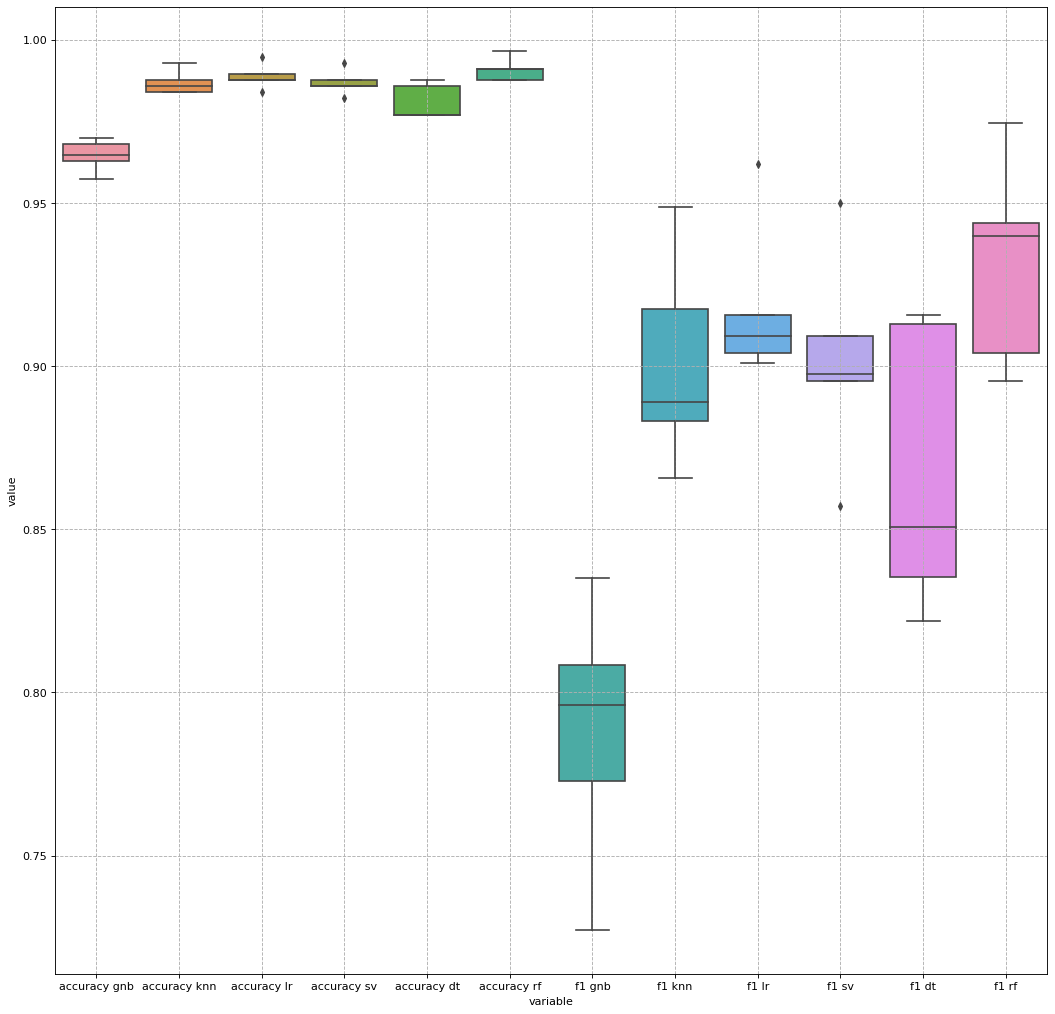

In [94]:
#Comparison between models's accuracy and f1 score using boxplot
plt.figure(figsize=(16, 16), dpi=80)

sns.boxplot(x="variable",y="value",data=pd.melt(df))
plt.grid(linestyle='--')
plt.show()

In [91]:
ar = np.array([[nb_recall, nb__accuracy,nb_precision], 
                [knn_recall, knn__accuracy,knn_precision], 
                [lr_recall, lr__accuracy,lr_precision],
                [sv_recall, sv__accuracy, sv_precision],
                [dt_recall, dt__accuracy, dt_precision],
                [rf_recall, rf__accuracy, rf_precision],
                ])
df = pd.DataFrame(ar, index = ['Naive Bayes', 'K-Nearest Neighbours','Logistic Regression','SVM', 'Decision Tree', 'Random Forest'], 
                      columns = ['Recall', 'Accuracy', 'Precision'])
df

,Recall,Accuracy,Precision
Naive Bayes,1.000000,97.699115,0.704545
K-Nearest Neighbours,1.000000,99.646018,0.939394
Logistic Regression,1.000000,99.646018,0.939394
SVM,0.935484,99.469027,0.966667
Decision Tree,1.000000,98.407080,0.775000
Random Forest,1.000000,99.646018,0.939394


    Rien qu'à partir du graphique des boites à moustaches, on remarque que l'algorithme Random Forest s'avère le plus pertinent qui fournit de bons résultats.